# 1. Understanding the problem statement.

#### Education company named X Education sells online courses to industry professionals. 

#### Company markets its courses on several channels. People fill up a form providing their details, they are classified to be a lead. The typical lead conversion rate is around 30%. 

#### To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 

#### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.


# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3. Importing the Dataset

In [2]:
dataset= pd.read_csv("Leads.csv")

In [3]:
# Viewing the dataset in structured form
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of the dataset
dataset.shape

(9240, 37)

#### The dataset has 9240 rows and 37 columns in total.

In [5]:
# Checking the datatype and the count of null values present in every column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 4. Data cleaning and Data imputation

In [6]:
# Calculating the percentage of null values in each column
print((dataset.isnull().sum().sort_values(ascending= False)/len(dataset))*100)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
null_previous_df= pd.DataFrame(round((dataset.isnull().sum().sort_values(ascending= False)/len(dataset))*100,2)).reset_index()
null_previous_df.columns=['col_name', 'Null_value_percentage']
null_previous_df

,col_name,Null_value_percentage
0,Lead Quality,51.59
1,Asymmetrique Activity Index,45.65
2,Asymmetrique Profile Score,45.65
3,Asymmetrique Activity Score,45.65
4,Asymmetrique Profile Index,45.65
5,Tags,36.29
6,Lead Profile,29.32
7,What matters most to you in choosing a course,29.32
8,What is your current occupation,29.11
9,Country,26.63


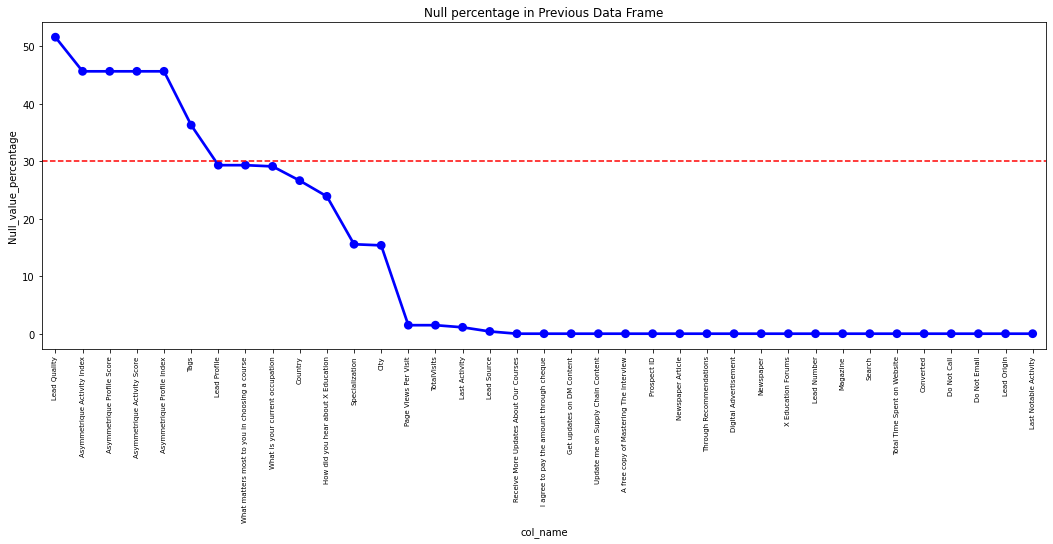

In [8]:
fig= plt.figure(figsize=(18,6))
ax= sns.pointplot(x='col_name', y='Null_value_percentage', data= null_previous_df, color='blue' )
plt.xticks(rotation=90, fontsize=7)
ax.axhline(30, ls='--', color='red')
plt.title('Null percentage in Previous Data Frame')
plt.xlabel("col_name")
plt.ylabel('Null_value_percentage')
plt.show()

#### We observe that out of 37 columns 17 columns have null values. We have decided to remove all the columns having null value greater than 30%. Therefore we'll be dropping  6 columns in total. The other columns which has null value percentage lesser than 30% we'll impute them either with Mean or mode values. 

In [9]:
# Assigning a variable which would carry the value for 30% of the data
x1=(9240*30)/100

In [10]:
print(x1)

2772.0


In [11]:
# Applying 30% cutoff on the dataset to remove the columns with null values above 30%
len(dataset.columns[dataset.isnull().sum()<x1])

31

In [12]:
# Dropping all the columns having null values more than 30%.
dataset= dataset[dataset.columns[dataset.isnull().sum()<x1]]

In [13]:
dataset.shape

(9240, 31)

In [14]:
# Checking the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
# Dropping redundant columns like 'Prospect ID','Lead Number','Country',
# 'I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

red_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

dataset =dataset.drop(red_cols,1)

In [16]:
dataset.shape

(9240, 25)

In [17]:
print((dataset.isnull().sum().sort_values(ascending=False)/len(dataset))*100)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.0000

#### We see there are couple of columns with null values. We have to find the data type of those columns and then find the type of column it is. If the column is numerical then we can impute the missing data with mean value, if the column has categorical value then we have to replace it mode value.

In [18]:
# Finding the type of column and the data type of it.
dataset['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [19]:
dataset['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [20]:
dataset['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [21]:
dataset['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [22]:
dataset['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [23]:
dataset['Page Views Per Visit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [24]:
dataset['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [25]:
dataset['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

### Note:
* We observe that there are couple of columns which has 'select' as the data in it. Hence, we are required to replace those values with the Nan values.

In [26]:
# Creating a for loop and the required columns are appended into a new list

cols=list(dataset.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(dataset[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
text # column names having label 'Select'

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [27]:
dataset= dataset.replace(to_replace="Select", value=np.nan)

In [28]:
print((dataset.isnull().sum().sort_values(ascending=False)/len(dataset))*100)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.0000

In [29]:
dataset['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [30]:
# Dropping all the columns having null values more than 30%.
dataset= dataset[dataset.columns[dataset.isnull().sum()<x1]]

In [31]:
print((dataset.isnull().sum().sort_values(ascending=False)/len(dataset))*100)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
Magazine                                          0.0000

In [32]:
print((dataset.isnull().sum().sort_values(ascending=False)/len(dataset))*100)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
Magazine                                          0.0000

In [33]:
dataset.shape

(9240, 22)

## Notes

* After dropping the columns with null value more than 30% we have 22 columns.
* In those 22 columns we see that there are 5 columns where null value exists.
* To treat these we must find whether these are categorical columns or numerical columns.
* Dividing them to categorical and numerical set.
    * Categorical column: 
        * 'What matters most to you in choosing a course'
        * What is your current occupation
        * Last Activity
        * Lead Source
    * Numerical column:
        * Page Views Per Visit
        
* We will treat all the missing values of the categorical columns using mode and missing values of the numerical columns with mean.

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   What is your current occupation                6550 

In [35]:
# Let's start with first columns of missing values

dataset['Lead Source'].value_counts().head(5)   # Lead Source column

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

In [36]:
# TotalVisits column

dataset['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [37]:
dataset['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [38]:
dataset['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [39]:
dataset['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [40]:
dataset['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
# Treating all the missing Numerical values by mean value of the column.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
dataset[['Page Views Per Visit','TotalVisits']]= imputer.fit_transform(dataset[['Page Views Per Visit',"TotalVisits"]])

In [42]:
dataset['Page Views Per Visit'].isnull().sum()

0

In [43]:
# Treating all the missing categorical values by mode value of the column.
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
data= np.array(dataset[['What matters most to you in choosing a course','What is your current occupation','Last Activity','Lead Source']],dtype=object)
dataset[['What matters most to you in choosing a course','What is your current occupation','Last Activity','Lead Source']] = imputer.fit_transform(data)

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   What is your current occupation                9240 

In [45]:
# Re-checking the percentage of null values in the dataset.
print((dataset.isnull().sum()/len(dataset))*100)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses        

In [46]:
dataset.shape

(9240, 22)

In [47]:
# Let's start with first columns of missing values

dataset['Lead Source'].value_counts()  # Lead Source column

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
WeLearn                 1
testone                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
youtubechannel          1
Name: Lead Source, dtype: int64

In [48]:
# TotalVisits column

dataset['TotalVisits'].value_counts()

0.000000      2189
2.000000      1680
3.000000      1306
4.000000      1120
5.000000       783
6.000000       466
1.000000       395
7.000000       309
8.000000       224
9.000000       164
3.445238       137
10.000000      114
11.000000       86
13.000000       48
12.000000       45
14.000000       36
16.000000       21
15.000000       18
17.000000       16
18.000000       15
20.000000       12
19.000000        9
23.000000        6
21.000000        6
24.000000        5
27.000000        5
25.000000        5
22.000000        3
28.000000        2
29.000000        2
26.000000        2
115.000000       1
41.000000        1
55.000000        1
32.000000        1
141.000000       1
54.000000        1
42.000000        1
251.000000       1
74.000000        1
43.000000        1
30.000000        1
Name: TotalVisits, dtype: int64

In [49]:
dataset['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [50]:
dataset['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [51]:
dataset['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [52]:
dataset['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [53]:
# Applying lambda to captilize the first character of the column 'Lead Source'

dataset['Lead Source']=dataset['Lead Source'].apply(lambda x:x.capitalize())
dataset['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Press_release           2
Social media            2
Youtubechannel          1
Pay per click ads       1
Testone                 1
Welearnblog_home        1
Blog                    1
Nc_edm                  1
Welearn                 1
Name: Lead Source, dtype: int64

### Note:
* We have treated all the missing value with mode and mean value. There is no missing data in the dataset and hence it is ready for further exploration. 

In [54]:
# Since we know that out target/ dependent variable is "Converted", therefore we'll shift this row to the last of our column for our convenience.
df1 = dataset.pop("Converted")
dataset['Converted']= df1

In [55]:
dataset.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity,Converted
0,API,Olark chat,No,No,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,Modified,0
1,API,Organic search,No,No,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,Email Opened,0
2,Landing Page Submission,Direct traffic,No,No,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,...,No,No,No,No,No,No,No,No,Email Opened,1
3,Landing Page Submission,Direct traffic,No,No,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,Modified,1


In [56]:
dataset.select_dtypes(include=np.number).columns.tolist()

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Converted']

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

In [58]:
dataset= dataset.replace(to_replace=["Yes","No"],value=[1,0])

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

In [60]:
df1= pd.get_dummies(dataset[["Lead Origin","Lead Source","Last Activity","What is your current occupation","What matters most to you in choosing a course","Last Notable Activity"]], drop_first=True)
dataset= pd.concat([dataset,df1],1)
dataset.shape

(9240, 83)

In [61]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [62]:
dataset.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic search,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct traffic,0,0,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Origin                                                              9240 non-null   object 
 1   Lead Source                                                              9240 non-null   object 
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   TotalVisits                                                              9240 non-null   float64
 5   Total Time Spent on Website                                              9240 non-null   int64  
 6   Page Views Per Visit                                                    

In [64]:
dataset = dataset.drop(dataset[["Lead Origin","Lead Source","Last Activity","What is your current occupation","What matters most to you in choosing a course","Last Notable Activity"]],1)

In [65]:
dataset.shape

(9240, 77)

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   TotalVisits                                                              9240 non-null   float64
 3   Total Time Spent on Website                                              9240 non-null   int64  
 4   Page Views Per Visit                                                     9240 non-null   float64
 5   Search                                                                   9240 non-null   int64  
 6   Magazine                                                                

In [67]:
# Dropping redundant variables, these values only had '0' as the data in whole column

dataset= dataset.drop(dataset[['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']],1)

In [68]:
dataset.shape

(9240, 73)

In [69]:
dataset[['TotalVisits','Page Views Per Visit']]=dataset[['TotalVisits','Page Views Per Visit']].apply(np.int64)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Do Not Email                                                             9240 non-null   int64
 1   Do Not Call                                                              9240 non-null   int64
 2   TotalVisits                                                              9240 non-null   int64
 3   Total Time Spent on Website                                              9240 non-null   int64
 4   Page Views Per Visit                                                     9240 non-null   int64
 5   Search                                                                   9240 non-null   int64
 6   Newspaper Article                                                        9240 non-null  

## 5. Checking for Outliers

In [70]:
round(dataset.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.0,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,3.44,487.70,2.29,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.53,0.08,0.01,0.00,0.00,0.00,0.28,0.01,0.31,0.00,0.00,0.19,0.12,0.00,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.04,0.03,0.00,0.38,0.00,0.01,0.00,0.11,0.07,0.00,0.30,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.9,0.08,0.00,0.00,0.01,0.02,0.00,0.31,0.00,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,4.82,548.02,2.15,0.04,0.01,0.01,0.01,0.02,0.03,0.49,0.50,0.27,0.08,0.01,0.01,0.02,0.45,0.08,0.46,0.01,0.01,0.39,0.33,0.01,0.01,0.23,0.12,0.01,0.01,0.01,0.01,0.12,0.01,0.21,0.18,0.17,0.01,0.49,0.01,0.11,0.06,0.31,0.25,0.01,0.46,0.10,0.08,0.03,0.01,0.03,0.04,0.15,0.3,0.27,0.01,0.01,0.08,0.14,0.01,0.46,0.01,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

* As we can see there are outliers in 3 variables 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit'.

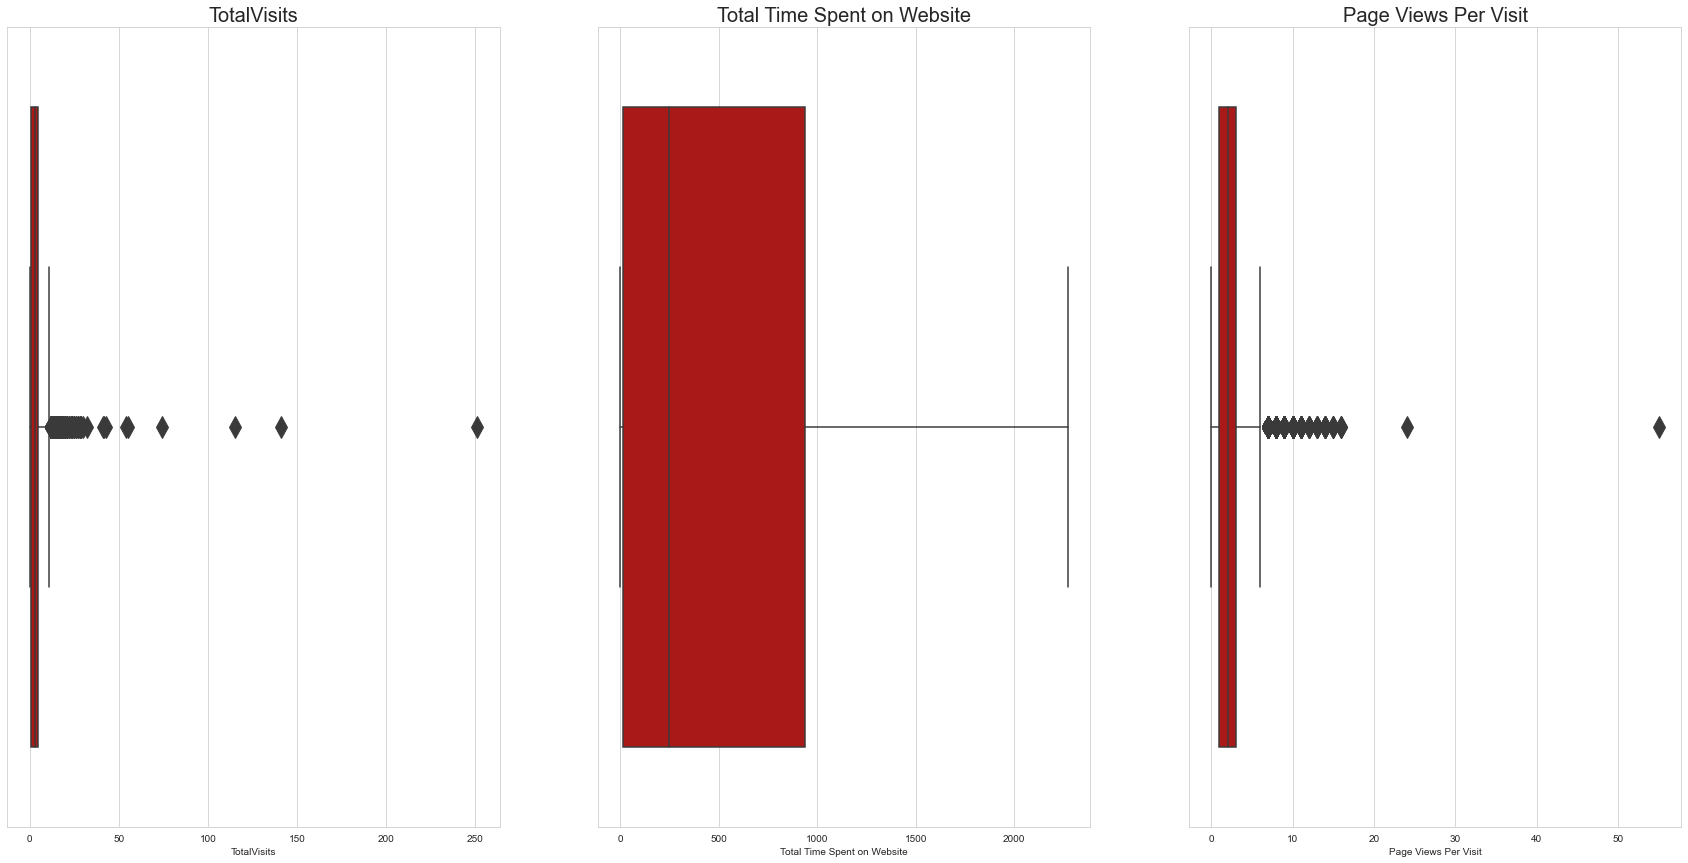

In [71]:
# lets plot a bosplot and visualize it.
# Setting size of figure, context and gridlines

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=dataset[col[i]],data=dataset,palette='gist_heat',orient='v',fliersize=15)  # using boxplot

In [72]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    dataset[list(ranges_total_visits.keys())[i]]=dataset['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)


In [73]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    dataset[list(ranges_total_visits_1.keys())[i]]=dataset['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)


In [74]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

dataset=dataset.drop(redundant,axis=1)

dataset.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## 6. Data Preparation

### Train- Test split the data

In [75]:
y= dataset.pop('Converted')


In [76]:
print(y)

0       0
1       0
2       1
3       0
4       1
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      1
13      0
14      0
15      1
16      0
17      0
18      1
19      0
20      0
21      0
22      1
23      0
24      1
25      1
26      1
27      1
28      0
29      1
30      1
31      0
32      0
33      0
34      1
35      1
36      0
37      1
38      0
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      1
51      0
52      0
53      0
54      0
55      0
56      1
57      1
58      0
59      0
60      0
61      0
62      1
63      0
64      1
65      1
66      1
67      1
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      1
76      1
77      1
78      0
79      1
80      0
81      1
82      1
83      0
84      1
85      0
86      0
87      0
88      1
89      0
90      0
91      1
92      0
93      0
94      0
95      0
96      0
97      0
98      1
99      1


In [77]:
dataset.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [78]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
X= dataset

In [80]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=100)

### Feature standardization

In [82]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[['Total Time Spent on Website']]= sc.fit_transform(X_train[['Total Time Spent on Website']])
X_test[['Total Time Spent on Website']]= sc.transform(X_test[['Total Time Spent on Website']])

In [83]:
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


### Correlation of datset

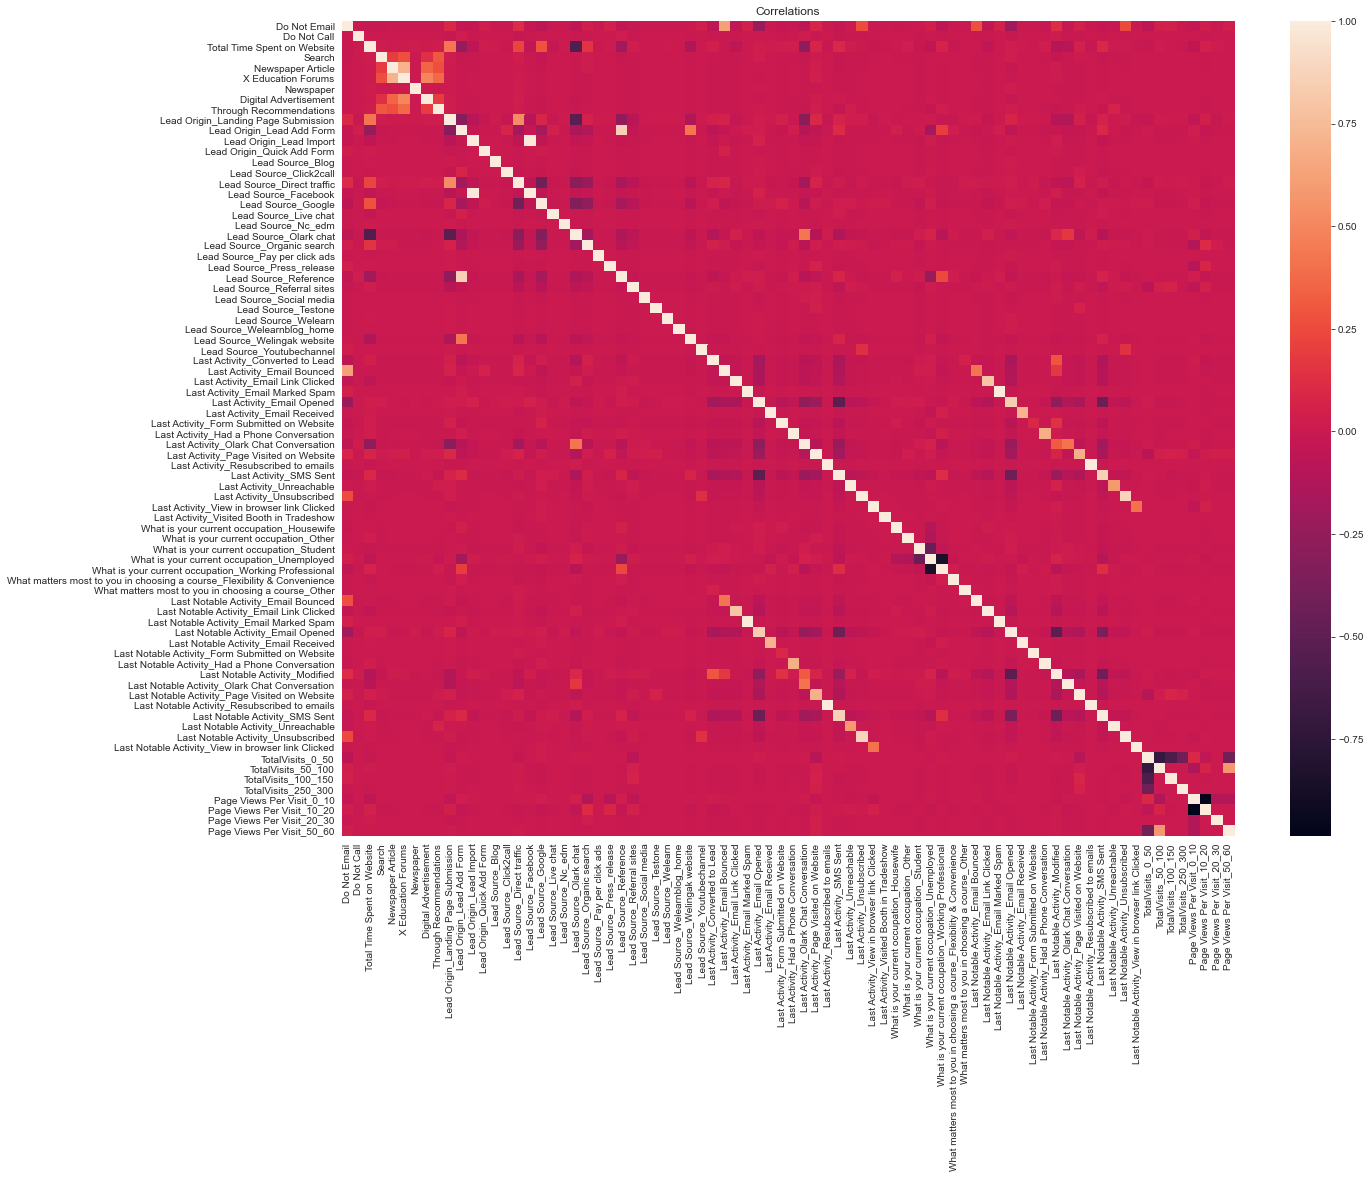

In [84]:
plt.figure(figsize=(20,15))
plt.title('Correlations')
sns.heatmap(dataset.corr(method='spearman'))
plt.show()

##### Dropping highly correlated variables

In [85]:
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']

X_train=X_train.drop(corr_dummy,1)      # dropping from X train set

X_test=X_test.drop(corr_dummy,1)       # dropping from X test set

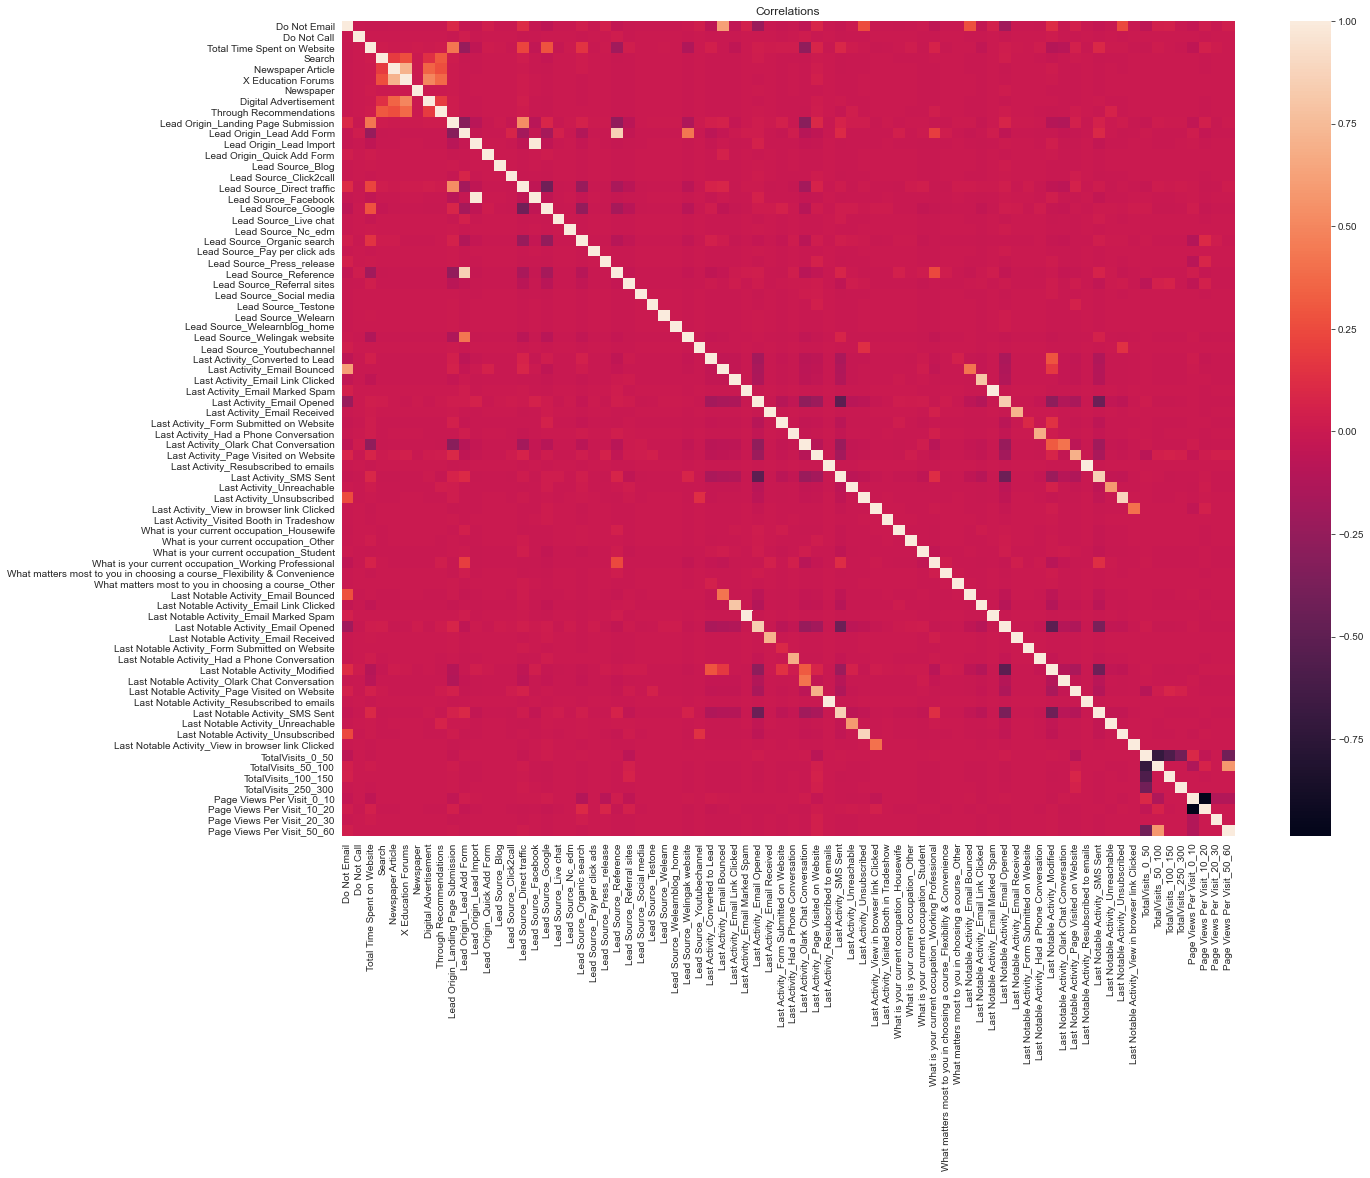

In [86]:
plt.figure(figsize=(20,15))
plt.title('Correlations')
sns.heatmap(dataset[X_train.columns].corr(method='spearman'))
plt.show()

Now, both of them are removed and new correlation is shown above by heatmap, We will now proceed with building our model based on the p-values and VIFs, we will again check for correlation as from above heatmap it is difficult to spot the highly correlated variables.

## Building Model

In [87]:
import statsmodels.api as sm
logis= sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 08 Dec 2021   Deviance:                   1.8734e+05
Time:                        21:13:49   Pearson chi2:                 9.16e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.158e+15   2.66e+07   1.57e+08      0.000    4.16e+15    4.16e+15
Do Not Email                                                            -7.197e+14   4.41e+06  -1.63e+08      0.000    -7.2e+14    -7.2e+14
Do Not Call                                                              1.216e+16   4.75e+07   2.56e+08      0.000    1.22e+16    1.22e+16
Total Time Spent on Website                                             -6.757e+13   8.36e+05  -8.08e+07      0.000   -6.76e+13   -6.76e+13
Search                                                                   -5.87e+14    2.2e+07  -2.67e+07      0.000   -5.87e+14   -5.87e+14
Newspaper Article                                                        9.685e+15   6.72e+07   1.44e+08      0.000    9.68e+15    9.68e+15
X Education Forums                                                      -1.133e+16   1.11e+08  -1.02e+08      0.000   -1.13e+16   -1.13e+16
Newspaper                                                               -4.039e+15   6.72e+07  -6.01e+07      0.000   -4.04e+15   -4.04e+15
Digital Advertisement                                                   -3.966e+15   4.75e+07  -8.35e+07      0.000   -3.97e+15   -3.97e+15
Through Recommendations                                                  7.152e+14   2.85e+07   2.51e+07      0.000    7.15e+14    7.15e+14
Lead Origin_Landing Page Submission                                     -6.369e+13   1.84e+06  -3.46e+07      0.000   -6.37e+13   -6.37e+13
Lead Origin_Lead Add Form                                                3.198e+14   1.28e+07    2.5e+07      0.000     3.2e+14     3.2e+14
Lead Origin_Lead Import                                                 -3.443e+14   4.79e+07  -7.18e+06      0.000   -3.44e+14   -3.44e+14
Lead Origin_Quick Add Form                                               5.768e+15   6.73e+07   8.57e+07      0.000    5.77e+15    5.77e+15
Lead Source_Blog                                                         -3.75e+15   6.72e+07  -5.58e+07      0.000   -3.75e+15   -3.75e+15
Lead Source_Click2call                                                  -1.164e+15   4.09e+07  -2.85e+07      0.000   -1.16e+15   -1.16e+15
Lead Source_Direct traffic                                               8.036e+13   3.17e+06   2.53e+07      0.000    8.04e+13    8.04e+13
Lead Source_Facebook                                                    -1.901e+14   4.79e+07  -3.96e+06      0.000    -1.9e+14    -1.9e+14
Lead Source_Google                                                       1.282e+14   2.22e+06   5.77e+07      0.000    1.28e+14    1.28e+14
Lea

There are so many variables which has its P-value more than 0.05. Therefore, we'll select variables using RFE

## Using RFE

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg= LogisticRegression()


In [89]:
rfem= RFE(logreg,19)
rfem= rfem.fit(X_train,y_train)

In [90]:
rfem.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [91]:
col= X_train.columns[rfem.support_]
X_train_1= sm.add_constant(X_train[col])

In [92]:
logis= sm.GLM(y_train,X_train_1, family= sm.families.Binomial())
reg_1=logis.fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.1
Date:                Wed, 08 Dec 2021   Deviance:                       5358.3
Time:                        21:14:09   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1701      0.104     11.259      0.000       0.966       1.374
Do Not Email                                            -1.2346      0.193     -6.382      0.000      -1.614      -0.855
Total Time Spent on Website                              1.0853      0.039     27.645      0.000       1.008       1.162
Lead Origin_Lead Add Form                                2.7400      0.195     14.053      0.000       2.358       3.122
Lead Source_Direct traffic                              -1.2903      0.114    -11.343      0.000      -1.513      -1.067
Lead Source_Google                                      -0.9024      0.107     -8.460      0.000      -1.111      -0.693
Lead Source_Organic search                              -1.0645      0.132     -8.043      0.000      -1.324      -0.805
Lead Source_Referral sites                              -1.1262      0.312     -3.605      0.000      -1.739      -0.514
Lead Source_Welingak website                             1.8681      0.744      2.512      0.012       0.410       3.326
Last Activity_Converted to Lead                         -1.0016      0.226     -4.435      0.000      -1.444      -0.559
Last Activity_Email Bounced                             -1.0933      0.345     -3.171      0.002      -1.769      -0.418
Last Activity_Olark Chat Conversation                   -1.1949      0.193     -6.182      0.000      -1.574      -0.816
What is your current occupation_Housewife               22.8758   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7957      0.188     14.846      0.000       2.427       3.165
Last Notable Activity_Email Link Clicked                -1.8728      0.275     -6.818      0.000      -2.411      -1.334
Last Notable Activity_Email Opened                      -1.3280      0.087    -15.274      0.000      -1.498      -1.158
Last Notable Activity_Had a Phone Conversation           2.0560      1.105      1.861      0.063      -0.110       4.222
Last Notable Activity_Modified                          -1.7097      0.099    -17.196      0.000      -1.905      -1.515
Last Notable Activity_Olark Chat Conversation           -1.4494      0.374     -3.876      0.000      -2.182      -0.717
Last Notable Activity_Page Visited on Website           -1.5749      0.192     -8.219      0.000      -1.950      -1.199
========================================================================================================================
"""

## VIF

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
vif= pd.DataFrame()

In [95]:
vif['Feature']= X_train_1[col].columns
vif['VIF']= [variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
16,Last Notable Activity_Modified,2.58
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.79
3,Lead Source_Direct traffic,1.73
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
17,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


We observe that the VIF of all the variable is lesser than the 5 which indicates that there is no multicollinearity in the data therefore we should focus on P-value and remove the variable which is more than 0.005.

In [96]:
X_train_2= X_train_1.drop(["const","What is your current occupation_Housewife"],1)

In [97]:
X_train_2= sm.add_constant(X_train_2)

In [98]:
logis_2= sm.GLM(y_train,X_train_2, family= sm.families.Binomial())
reg_2= logis_2.fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.0
Date:                Wed, 08 Dec 2021   Deviance:                       5372.1
Time:                        21:14:12   Pearson chi2:                 7.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1653      0.104     11.221      0.000       0.962       1.369
Do Not Email                                            -1.2380      0.193     -6.399      0.000      -1.617      -0.859
Total Time Spent on Website                              1.0844      0.039     27.652      0.000       1.008       1.161
Lead Origin_Lead Add Form                                2.7599      0.195     14.180      0.000       2.378       3.141
Lead Source_Direct traffic                              -1.2861      0.114    -11.318      0.000      -1.509      -1.063
Lead Source_Google                                      -0.8965      0.107     -8.413      0.000      -1.105      -0.688
Lead Source_Organic search                              -1.0550      0.132     -7.984      0.000      -1.314      -0.796
Lead Source_Referral sites                              -1.1262      0.312     -3.606      0.000      -1.738      -0.514
Lead Source_Welingak website                             1.8466      0.744      2.483      0.013       0.389       3.304
Last Activity_Converted to Lead                         -1.0105      0.226     -4.477      0.000      -1.453      -0.568
Last Activity_Email Bounced                             -1.0969      0.345     -3.180      0.001      -1.773      -0.421
Last Activity_Olark Chat Conversation                   -1.2013      0.193     -6.218      0.000      -1.580      -0.823
What is your current occupation_Working Professional     2.7905      0.188     14.819      0.000       2.421       3.160
Last Notable Activity_Email Link Clicked                -1.8549      0.272     -6.814      0.000      -2.388      -1.321
Last Notable Activity_Email Opened                      -1.3216      0.087    -15.214      0.000      -1.492      -1.151
Last Notable Activity_Had a Phone Conversation           2.0542      1.105      1.859      0.063      -0.112       4.220
Last Notable Activity_Modified                          -1.7007      0.099    -17.134      0.000      -1.895      -1.506
Last Notable Activity_Olark Chat Conversation           -1.4402      0.374     -3.852      0.000      -2.173      -0.708
Last Notable Activity_Page Visited on Website           -1.5744      0.192     -8.218      0.000      -1.950      -1.199
========================================================================================================================
"""

In [99]:
X_train_2= X_train_2.drop(["const",'Last Notable Activity_Had a Phone Conversation'],1)

In [100]:
X_train_3 = sm.add_constant(X_train_2)

In [101]:
logis_3= sm.GLM(y_train,X_train_3, family= sm.families.Binomial())
reg_3= logis_3.fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.5
Date:                Wed, 08 Dec 2021   Deviance:                       5377.0
Time:                        21:14:12   Pearson chi2:                 7.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1721      0.104     11.290      0.000       0.969       1.376
Do Not Email                                            -1.2452      0.193     -6.436      0.000      -1.624      -0.866
Total Time Spent on Website                              1.0821      0.039     27.628      0.000       1.005       1.159
Lead Origin_Lead Add Form                                2.7597      0.195     14.175      0.000       2.378       3.141
Lead Source_Direct traffic                              -1.2823      0.114    -11.289      0.000      -1.505      -1.060
Lead Source_Google                                      -0.8885      0.106     -8.347      0.000      -1.097      -0.680
Lead Source_Organic search                              -1.0495      0.132     -7.949      0.000      -1.308      -0.791
Lead Source_Referral sites                              -1.1228      0.312     -3.596      0.000      -1.735      -0.511
Lead Source_Welingak website                             1.8473      0.744      2.484      0.013       0.390       3.305
Last Activity_Converted to Lead                         -1.0111      0.226     -4.482      0.000      -1.453      -0.569
Last Activity_Email Bounced                             -1.0940      0.345     -3.172      0.002      -1.770      -0.418
Last Activity_Olark Chat Conversation                   -1.2004      0.193     -6.214      0.000      -1.579      -0.822
What is your current occupation_Working Professional     2.7889      0.188     14.811      0.000       2.420       3.158
Last Notable Activity_Email Link Clicked                -1.8651      0.272     -6.853      0.000      -2.399      -1.332
Last Notable Activity_Email Opened                      -1.3327      0.087    -15.365      0.000      -1.503      -1.163
Last Notable Activity_Modified                          -1.7112      0.099    -17.259      0.000      -1.906      -1.517
Last Notable Activity_Olark Chat Conversation           -1.4500      0.374     -3.880      0.000      -2.182      -0.718
Last Notable Activity_Page Visited on Website           -1.5849      0.191     -8.277      0.000      -1.960      -1.210
========================================================================================================================
"""

We observe here that the P-value of all the variable is below the significane level. Let's check the VIF and cross-verify the presence of multicollinearity. 

In [102]:
# Checking the VIF of the final model
X_train_3_1= X_train_3.drop("const",1)
vif_2= pd.DataFrame()
vif_2['Features'] = X_train_3_1.columns
vif_2['VIF']= [variance_inflation_factor(X_train_3_1.values,i) for i in range(X_train_3_1.shape[1])]
vif_2['VIF']= round(vif_2["VIF"],2)
vif_2= vif_2.sort_values(by="VIF", ascending=False)
vif_2

,Features,VIF
14,Last Notable Activity_Modified,2.57
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.78
3,Lead Source_Direct traffic,1.73
13,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
15,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


## Predicting the Test model

In [103]:
y_pred= reg_3.predict(X_train_3)
y_pred_final= pd.DataFrame({"converted":y_train.values, "converted_probability":y_pred, "ID": y_train.index})
y_pred_final.head()

,converted,converted_probability,ID
1871,0,0.246269,1871
6795,0,0.192070,6795
3516,0,0.287259,3516
8105,0,0.853337,8105
3934,0,0.182852,3934


## ROC curve plotting

In [104]:
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )   
    plt.figure(figsize=(8, 4))
    plt.plot( fpr, tpr, label=f'ROC curve (area = {auc_score})')
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.xlim([0.0, 1.0])   # limit in the X-axis
    plt.ylim([0.0, 1.05])  # limit in the Y-axis
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None   # no return

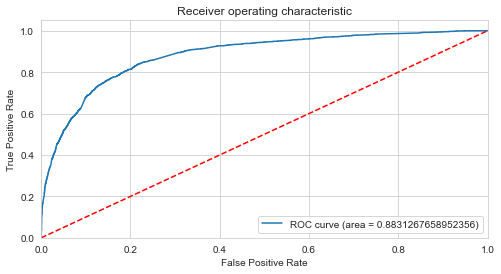

In [105]:
# Calling the roc curve for plotting

edu_roc(y_pred_final.converted, y_pred_final.converted_probability)

## Finding optimal probability cutoff point

In [106]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_pred_final[i]=y_pred_final['converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_pred_final.head()

,converted,converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.246269,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.192070,6795,1,1,0,0,0,0,0,0,0,0
3516,0,0.287259,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.853337,8105,1,1,1,1,1,1,1,1,1,0
3934,0,0.182852,3934,1,1,0,0,0,0,0,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding 'Accuracy', 'Sensitivity' and 'Specificity' for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [107]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_pred_final['converted'],y_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.596320    0.968370     0.367066
0.2          0.2  0.753865    0.909570     0.657921
0.3          0.3  0.804731    0.836577     0.785107
0.4          0.4  0.815553    0.771695     0.842579
0.5          0.5  0.817873    0.704785     0.887556
0.6          0.6  0.797001    0.590024     0.924538
0.7          0.7  0.784477    0.515815     0.950025
0.8          0.8  0.757267    0.411598     0.970265
0.9          0.9  0.717069    0.276156     0.988756


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9. Out of this we have to choose one as a cutoff point and it is probability cutoff = 0.4 because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'

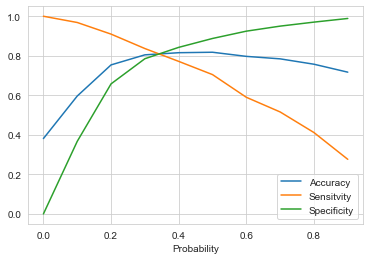

In [108]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is 0.40. Also we can see that there is a trade off between sensitivity and specificity.

In [109]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_pred_final['Predicted']=y_pred_final['converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_pred_final.head()

,converted,converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.246269,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.192070,6795,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.287259,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.853337,8105,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.182852,3934,1,1,0,0,0,0,0,0,0,0,0


## Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned.

In [110]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_pred_final.converted,y_pred_final.Predicted)
confusion_pr

array([[3372,  630],
       [ 563, 1903]], dtype=int64)

In [111]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7512830635609948
Recall 0.7716950527169505


Precision 0.7512830635609948
Recall 0.7716950527169505
Important point to be noted from the outcomes for precision and recall score -

    - Our precison percentage is 75% approximately and recall percentage is 78%
    - This means we have very good model which explains relevancy of 75% and true relevant results about 78%.

#### Note : As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.



## Precision and Recall trade-off

As we all know that Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two. Let's check that in below graph.

In [112]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

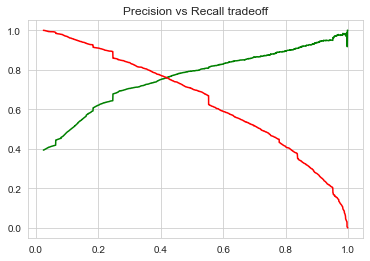

In [113]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_pred_final.converted,y_pred_final.converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5

## Prediction the test dataset


In [114]:
# Predicting the test dataset with our final model

test_cols=X_train_3.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg_3.predict(X_test_final)       # Predicting the final test set

In [115]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.717802,4269
2376,1,0.951373,2376
7766,1,0.903030,7766
9199,0,0.063117,9199
4359,1,0.837678,4359


### Model Evaluation

In [116]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.717802,4269,1
2376,1,0.951373,2376,1
7766,1,0.903030,7766,1
9199,0,0.063117,9199,0
4359,1,0.837678,4359,1


In [117]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn
print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score


Accuracy score in predicting test dataset : 0.8207070707070707


In [118]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.7773654916512059
Recall score in predicting test dataset: 0.765296803652968


## Lead Score assigning


In [119]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number']= dataset.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.717802,4269,1,0,72
2376,1,0.951373,2376,1,0,95
7766,1,0.903030,7766,1,0,90
9199,0,0.063117,9199,0,0,6
4359,1,0.837678,4359,1,0,84


## Conclusion
#### Valuable Insights -

 * The Accuracy, Precision and Recall score we got from test set in aceptable range.
 * We have high recall score than precision score which we were exactly looking for.
 * In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 * This concludes that the model is in stable state.
 * Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
   * Last Notable Activity_Had a Phone Conversation
   * Lead Origin_Lead Add Form and
   * What is your current occupation_Working Professional